In [ ]:
pip install optuna

In [217]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import optuna
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE

In [182]:
df=pd.read_csv("us_tornado_dataset_1950_2021.csv")
df.head(10,)

,yr,mo,dy,date,st,mag,inj,fat,slat,slon,elat,elon,len,wid
0,1950,1,3,1950-01-03,IL,3,3,0,39.10,-89.30,39.12,-89.23,3.6,130
1,1950,1,3,1950-01-03,MO,3,3,0,38.77,-90.22,38.83,-90.03,9.5,150
2,1950,1,3,1950-01-03,OH,1,1,0,40.88,-84.58,0.00,0.00,0.1,10
3,1950,1,13,1950-01-13,AR,3,1,1,34.40,-94.37,0.00,0.00,0.6,17
4,1950,1,25,1950-01-25,IL,2,0,0,41.17,-87.33,0.00,0.00,0.1,100
5,1950,1,25,1950-01-25,MO,2,5,0,37.60,-90.68,37.63,-90.65,2.3,300
6,1950,1,26,1950-01-26,TX,2,2,0,26.88,-98.12,26.88,-98.05,4.7,133
7,1950,2,11,1950-02-11,TX,2,0,0,29.42,-95.25,29.52,-95.13,9.9,400
8,1950,2,11,1950-02-11,TX,2,5,0,32.35,-95.20,32.42,-95.20,4.6,100
9,1950,2,11,1950-02-11,TX,2,6,0,32.98,-94.63,33.00,-94.70,4.5,67


In [12]:
df.shape[0]

67558

# Регрессия

## линейная рагрессия

In [106]:
X = df[['yr', 'mo', 'dy', 'inj', 'fat', 'slat', 'slon','elon', 'len', 'wid']]
y = df['mag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
test_mae = mean_absolute_error(y_test, y_pred)
print("MAE на тестовом наборе данных:", test_mae)

MAE на тестовом наборе данных: 0.6119650340973176


## дерево регрессии

In [38]:
params = {
    'max_depth': 50,
    'min_samples_split': 30,
    'min_samples_leaf': 10
}
model = DecisionTreeRegressor(**params)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 0.5367418814038631


# Применение PCA

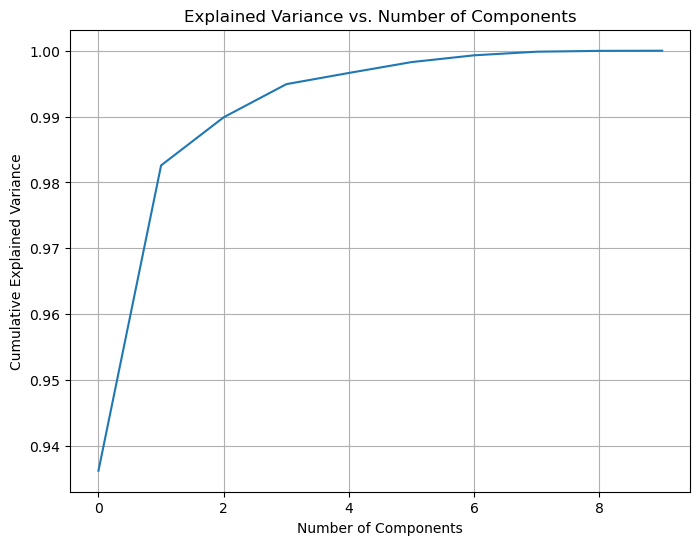

In [107]:
pca = PCA().fit(X)
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()


## для моего набора данных я могу использовать две фичи для снижения размерность и минимальной потери информации

## PCA для логистической регрессии

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
pca = PCA(n_components=2)
X_train_transformed = pca.fit_transform(X_train)
X_test_transformed = pca.transform(X_test)
model = LinearRegression()
model.fit(X_train_transformed, y_train)
y_pred = model.predict(X_test_transformed)
test_mae = mean_absolute_error(y_test, y_pred)
print("MAE на тестовом наборе данных:", test_mae)

MAE на тестовом наборе данных: 0.7243336045829643


## результат стал хуже, снижение размерности увеличило ошибку

In [49]:
params = {
    'max_depth': 50,
    'min_samples_split': 30,
    'min_samples_leaf': 10
}
model = DecisionTreeRegressor(**params)
model.fit(X_train_transformed, y_train)
y_pred = model.predict(X_test_transformed)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 0.6269401044946942


## для дерева модель также стала показывать большую ошибку

# LDA

In [109]:
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

In [94]:
# вопрос, как выбрать количество компонентов?

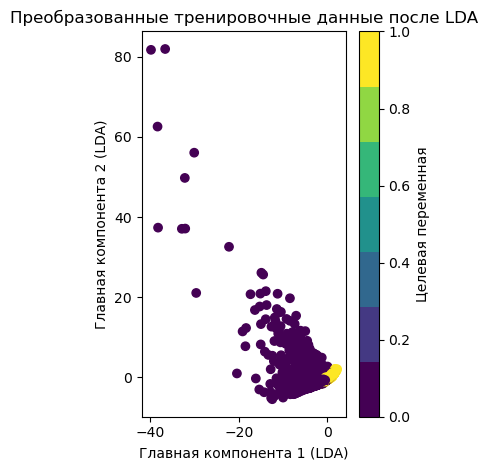

In [110]:
plt.subplot(1, 2, 2)
plt.scatter(X_train_lda[:, 0], X_train_lda[:, 1], c=y_train_encoded, cmap=plt.cm.get_cmap('viridis', len(set(y_train))))
plt.colorbar(label='Целевая переменная')
plt.xlabel('Главная компонента 1 (LDA)')
plt.ylabel('Главная компонента 2 (LDA)')
plt.title('Преобразованные тренировочные данные после LDA')

plt.tight_layout()
plt.show()


## линейная регрессия с лда

In [88]:
model = LinearRegression()
model.fit(X_train_lda, y_train)
y_pred = model.predict(X_test_lda)
test_mae = mean_absolute_error(y_test, y_pred)
print("MAE на тестовом наборе данных:", test_mae)

MAE на тестовом наборе данных: 0.6090492998556705


## оно показало результаты ошибки ниже, чем в обычных данных и ниже, чем с использованием PCA


## дерево регрессия с лда

In [93]:
params = {
    'max_depth': 50,
    'min_samples_split': 30,
    'min_samples_leaf': 10
}
model = DecisionTreeRegressor(**params)
model.fit(X_train_lda, y_train)
y_pred = model.predict(X_test_lda)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 0.6477142359980615


## а у дерева ошибка показывает наоборот самую большую ошибку

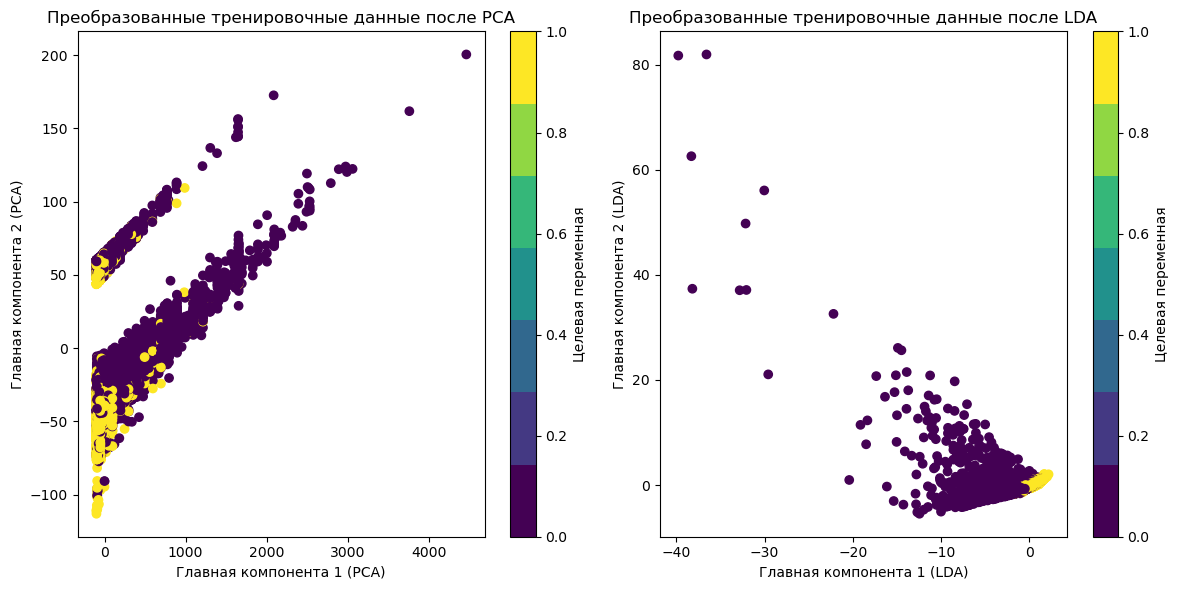

In [111]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_train_transformed[:, 0], X_train_transformed[:, 1], c=y_train_encoded, cmap=plt.cm.get_cmap('viridis', len(set(y_train))))
plt.colorbar(label='Целевая переменная')
plt.xlabel('Главная компонента 1 (PCA)')
plt.ylabel('Главная компонента 2 (PCA)')
plt.title('Преобразованные тренировочные данные после PCA')

plt.subplot(1, 2, 2)
plt.scatter(X_train_lda[:, 0], X_train_lda[:, 1], c=y_train_encoded, cmap=plt.cm.get_cmap('viridis', len(set(y_train))))
plt.colorbar(label='Целевая переменная')
plt.xlabel('Главная компонента 1 (LDA)')
plt.ylabel('Главная компонента 2 (LDA)')
plt.title('Преобразованные тренировочные данные после LDA')

plt.tight_layout()
plt.show()

## графики распрделения фичей для двух разных методов уменьшения размерности

# Классификация

In [183]:
mean_mag = df['mag'].mean()
df['mag'] = df['mag'].apply(lambda x: 'strong' if x >= mean_mag else 'weak')

# Random Forest

In [ ]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_int('max_depth', 5, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)
    model = RandomForestClassifier(
        n_estimators=n_estimators, 
        max_depth=max_depth, 
        min_samples_split=min_samples_split, 
        min_samples_leaf=min_samples_leaf, 
        random_state=42
    )
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = classification_report(y_test, y_pred, output_dict=True)['accuracy']
    return accuracy

X = df[['yr', 'mo', 'dy', 'inj', 'fat', 'slat', 'slon','elon', 'len', 'wid']]
y = df['mag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=15)

print("Best trial:")
print(study.best_trial.params)
print("Best accuracy:", study.best_trial.value)

## лучшие параметры подставляем в модель

In [151]:
X = df[['yr', 'mo', 'dy', 'inj', 'fat', 'slat', 'slon','elon', 'len', 'wid']]
y = df['mag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model = RandomForestClassifier(n_estimators=138,max_depth=20, min_samples_split=9, min_samples_leaf=2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

      strong       0.82      0.83      0.82     10607
        weak       0.81      0.80      0.80      9661

    accuracy                           0.82     20268
   macro avg       0.81      0.81      0.81     20268
weighted avg       0.81      0.82      0.81     20268



# Дерево решений

In [64]:
def objective(trial):
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
    max_depth = trial.suggest_int('max_depth', 1, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 30)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 30)
    
    model = DecisionTreeClassifier(
        criterion=criterion, 
        max_depth=max_depth, 
        min_samples_split=min_samples_split, 
        min_samples_leaf=min_samples_leaf, 
        random_state=42
    )
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = classification_report(y_test, y_pred, output_dict=True)['accuracy']
    
    return accuracy

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)


print("Best trial:")
print(study.best_trial.params)

## лучшие параметры подставляем в модель

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
params = {
    'criterion': 'entropy',
    'max_depth': 38,
    'min_samples_split': 16,
    'min_samples_leaf': 30
}
model = DecisionTreeClassifier(**params)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

      strong       0.79      0.82      0.81     10556
        weak       0.80      0.76      0.78      9712

    accuracy                           0.79     20268
   macro avg       0.79      0.79      0.79     20268
weighted avg       0.79      0.79      0.79     20268



# применение PCA

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
pca = PCA(n_components=2)
X_train_transformed = pca.fit_transform(X_train)
X_test_transformed = pca.transform(X_test)

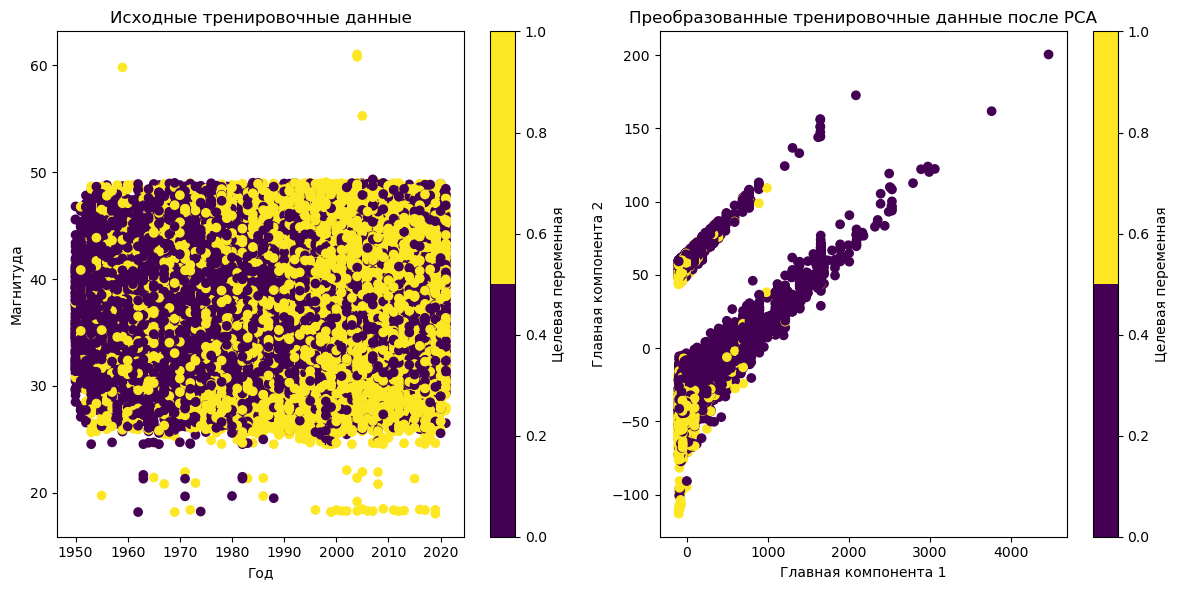

In [79]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 5], c=y_train_encoded, cmap=plt.cm.get_cmap('viridis', len(set(y_train))))
plt.colorbar(label='Целевая переменная')
plt.xlabel('Год')
plt.ylabel('Ма')
plt.title('Исходные тренировочные данные')

plt.subplot(1, 2, 2)
plt.scatter(X_train_transformed[:, 0], X_train_transformed[:, 1], c=y_train_encoded, cmap=plt.cm.get_cmap('viridis', len(set(y_train))))
plt.colorbar(label='Целевая переменная')
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('Преобразованные тренировочные данные после PCA')

plt.tight_layout()
plt.show()

In [80]:
# вопрос, а я вот хочу посмотреть разделение моих данных до применение PCA, как мне выбрать опорные признаки?

## модели буду применять на тех же параметрах

In [67]:
model = RandomForestClassifier(n_estimators=138,max_depth=20, min_samples_split=9, min_samples_leaf=2, random_state=42)
model.fit(X_train_transformed, y_train)
y_pred = model.predict(X_test_transformed)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

      strong       0.79      0.81      0.80     10556
        weak       0.79      0.76      0.78      9712

    accuracy                           0.79     20268
   macro avg       0.79      0.79      0.79     20268
weighted avg       0.79      0.79      0.79     20268



## результат стал чуть хуже

In [68]:
params = {
    'criterion': 'entropy',
    'max_depth': 38,
    'min_samples_split': 16,
    'min_samples_leaf': 30
}
model = DecisionTreeClassifier(**params)
model.fit(X_train_transformed, y_train)
y_pred = model.predict(X_test_transformed)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

      strong       0.77      0.80      0.78     10556
        weak       0.77      0.73      0.75      9712

    accuracy                           0.77     20268
   macro avg       0.77      0.77      0.77     20268
weighted avg       0.77      0.77      0.77     20268



## тут тоже((

# LDA

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lda = LDA(n_components=1)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# вопрос, почему когда количество компонентов равно 2 вылетает следующая ошибка 
<img src="ANSW.jpg"  width="600" height="300">

In [156]:
model = RandomForestClassifier(n_estimators=138,max_depth=20, min_samples_split=9, min_samples_leaf=2, random_state=42)
model.fit(X_train_lda, y_train)
y_pred = model.predict(X_test_lda)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

      strong       0.73      0.72      0.72     10556
        weak       0.70      0.70      0.70      9712

    accuracy                           0.71     20268
   macro avg       0.71      0.71      0.71     20268
weighted avg       0.71      0.71      0.71     20268



# результаты значительно хуже чем то что было без снижения размерности и пца

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
params = {
    'criterion': 'entropy',
    'max_depth': 38,
    'min_samples_split': 16,
    'min_samples_leaf': 30
}
model = DecisionTreeClassifier(**params)
model.fit(X_train_lda, y_train)
y_pred = model.predict(X_test_lda)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

      strong       0.72      0.72      0.72     10556
        weak       0.70      0.70      0.70      9712

    accuracy                           0.71     20268
   macro avg       0.71      0.71      0.71     20268
weighted avg       0.71      0.71      0.71     20268



# такая же ситуация

# кластеризация

In [184]:
df = pd.get_dummies(df, columns=['st'])

In [185]:
df = df.drop(columns=["mag", "date"])

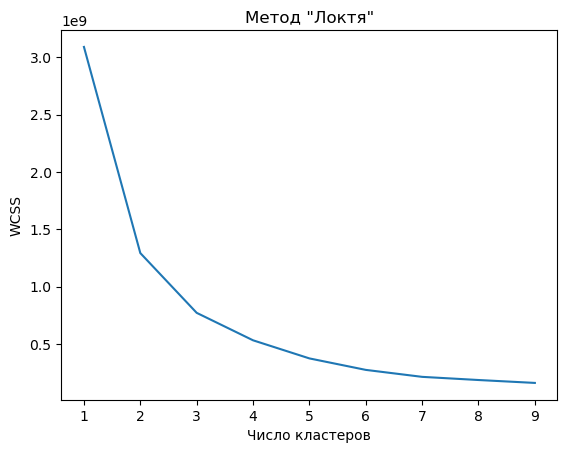

In [187]:
wcss=[]
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('Метод "Локтя"')
plt.xlabel('Число кластеров')
plt.ylabel('WCSS')
plt.show()

# где-то 4 кластера 

In [202]:
X = df
X = StandardScaler().fit_transform(X)

In [203]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=10)
kmeans_labels = kmeans.fit_predict(X)

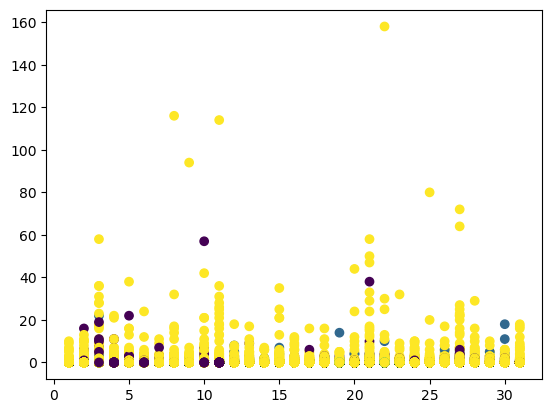

In [213]:
cluster_labels = kmeans.labels_
plt.scatter(df.iloc[:, 2], df.iloc[:, 4], c=cluster_labels, cmap='viridis')
plt.show()

In [226]:
dbi_score_kmeans = davies_bouldin_score(X, kmeans_labels)
print("Индекс Davies-Bouldin для KMeans:", dbi_score_kmeans)

Индекс Davies-Bouldin для KMeans: 2.723621194565345


In [214]:
inertia = kmeans.inertia_
print("Инерция:", inertia)

Инерция: 4020549.1726736873


# T-sne

In [221]:
X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X)

/opt/conda/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [222]:
kmeans_tsne = KMeans(n_clusters=4, random_state=42)
kmeans_tsne.fit(X_tsne)
cluster_labels_tsne = kmeans_tsne.labels_
dbi_score_tsne = davies_bouldin_score(X_tsne, cluster_labels_tsne)
print("Davies-Bouldin Index (DBI) для преобразованных данных:", dbi_score_tsne)

Davies-Bouldin Index (DBI) для преобразованных данных: 0.8540958448867566


In [223]:
inertia = kmeans_tsne.inertia_
print("Инерция:", inertia)

Инерция: 39413844.0


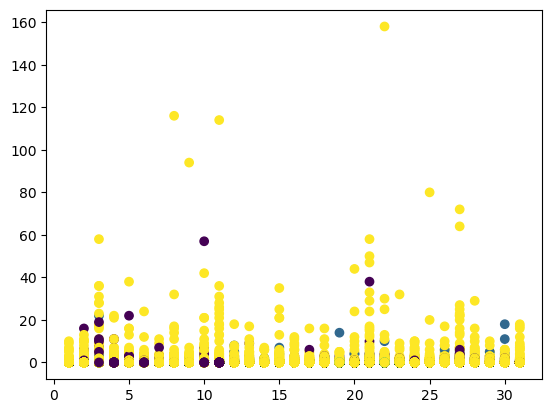

In [225]:
cluster_labels_tsne = kmeans.labels_
plt.scatter(df.iloc[:, 2], df.iloc[:, 4], c=cluster_labels, cmap='viridis')
plt.show()

# Выводы

<img src="lin.jpg"  width="600" height="300">

## у регресси мы видим , что снижение размерности влияет на увеличение ошибки и неплохо так, но если смотреть, то лучше с этой задачей справояется LDA

<img src="klas.jpg"  width="600" height="300">

## у классификации та же история, но в целом снижение размерности не кардинально ухудшает результат, PCA справляется с задачей классификации лучше

# Индекс Davies-Bouldin для KMeans равен примерно 2.72, а для TSNE примерно 0.85. Чем меньше значение индекса Davies-Bouldin, тем лучше, так как это указывает на более чистые и компактные кластеры. Сравнивая два значения, можно сказать, что кластеризация с помощью метода TSNE дает более четкие и различимые кластеры по сравнению с обычными данными.

# Инерция - это сумма квадратов расстояний каждой точки данных до их ближайшего центроида кластера. Чем меньше инерция, тем лучше, так как это указывает на более компактные кластеры. Для первого случая, инерция составляет приблизительно 4020549.17, а для второго - 39413844.0. Это означает, что в первом случае кластеры более компактные, чем во втором случае, где точки распределены более широко относительно их центроидов.







# Получается для задач кластеризации Т